In [215]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.expand_frame_repr = False

In [216]:
Cl = "Code Length"

In [217]:
data = pd.read_csv('github.csv')
data.head()

,Repository,Path,File Name,Code Length
0,7_complect,main.py,main.py,30
1,bitcoin_prediction,engine.py,engine.py,111
2,bitcoin_prediction,test.py,test.py,43
3,example-dvc-experiments,src/data_load.py,data_load.py,32
4,example-dvc-experiments,src/data_split.py,data_split.py,37


[Text(0.5, 1.0, 'Distribution of Code')]

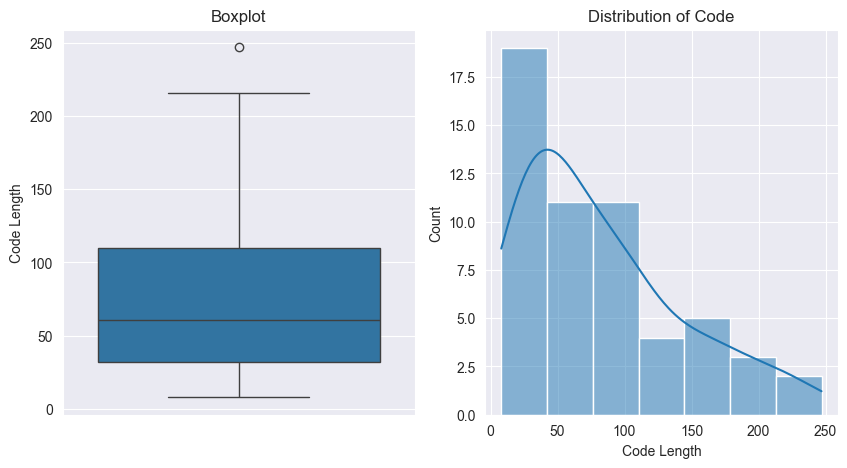

In [218]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

b = sns.boxplot(y=data[Cl], ax=axs[0])
b.set(title="Boxplot")
h = sns.histplot(data=data, x="Code Length", kde=True, ax=axs[1])
h.set(xlabel="Code Length", ylabel="Count")
h.set(title="Distribution of Code")

In [219]:
print(f'Выборочное среднее == {np.mean(data[Cl])}\n'
      f'Выборочная дисперсия == {np.var(data[Cl], ddof=1)}\n'
      f'Стандартное отклонение == {np.std(data[Cl], ddof=1)}\n'
      f'Медианное значение == {np.median(data[Cl])}\n'
      f'I-ая квартиля == {np.percentile(data[Cl], 25)}\n'
      f'II-ая квартиля == {np.percentile(data[Cl], 50)}\n'
      f'III-ая квартиля == {np.percentile(data[Cl], 75)}\n')

Выборочное среднее == 81.94545454545455
Выборочная дисперсия == 3622.645117845118
Стандартное отклонение == 60.18841348503147
Медианное значение == 61.0
I-ая квартиля == 32.0
II-ая квартиля == 61.0
III-ая квартиля == 110.0


In [220]:
df_grouped = data.groupby('Repository')['Code Length'].sum()

pie_fig = px.pie(df_grouped, values='Code Length', names=df_grouped.index,
             title='Total Code Length by Repository',
             labels={'Code Length':'Total Length'})
pie_fig.update_traces(textposition='inside', textinfo='percent+label')
pie_fig.show()